# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [31]:
# Load pickled data
import pickle

# Load the training and testing data
training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = validation['features'], validation['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [32]:
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_validation.shape[0]

# Number of testing examples
n_test = X_test.shape[0]

# The shape of an traffic sign image
image_shape = X_train.shape[1:3]

# Number of unique classes/labels in the dataset
n_classes = len(np.unique(y_train))

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print('Image Shape: {}'.format(X_train[0].shape))
print()
print('Training Set:   {} samples'.format(len(X_train)))
print('Validation Set: {} samples'.format(len(X_validation)))
print('Test Set:       {} samples'.format(len(X_test)))
print('Classes:        {}'.format(n_classes))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Classes:        43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Training Image with Label 5 at Random Index 13818:


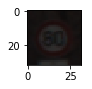

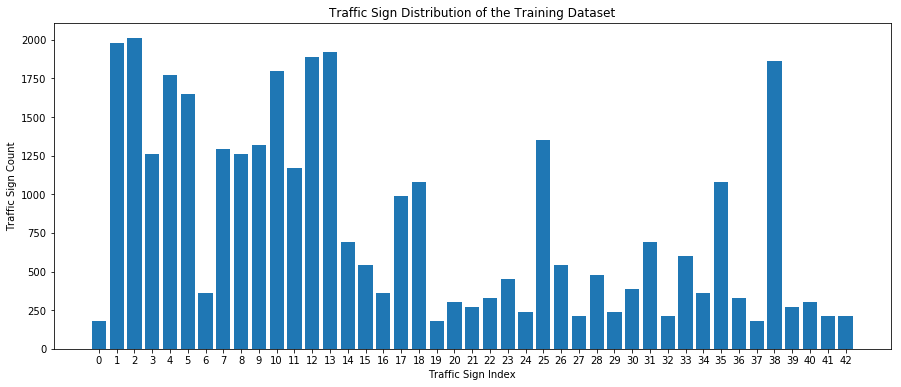

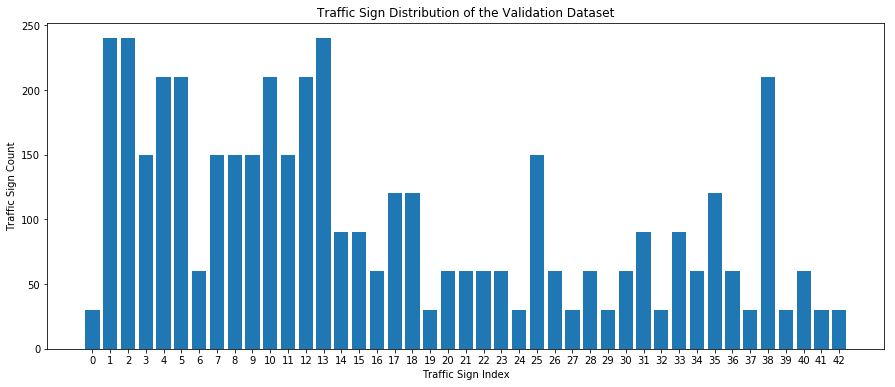

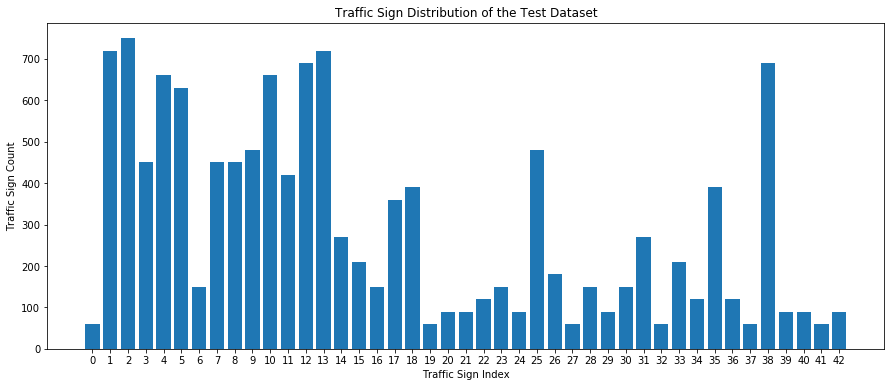

In [35]:
### Data exploration visualization
import random
import numpy as np
import collections
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook
%matplotlib inline

# 1. Show one image at a random index
index = random.randint(0, len(X_train))
print('Training Image with Label {} at Random Index {}:'.format(y_train[index], index))
image = X_train[index].squeeze()
plt.figure(figsize = (1, 1))
plt.imshow(image)
plt.show()

# A helper class to visualize the dataset
class DatasetVisualizer:
    def __init__(self):
        self.dataset = None
        self.title = 'Traffic Sign Distribution of Dataset'
        self.x_label = 'Traffic Sign Index'
        self.y_label = 'Traffic Sign Count'
        self.figure_size = (15, 6)
    
    def visualize(self):
        class_to_count_map = collections.Counter(self.dataset)
        
        horizontal_axis = range(n_classes)
        vertical_axis = [class_to_count_map[i] for i in horizontal_axis]
        
        plt.figure(figsize = self.figure_size)
        plt.bar(horizontal_axis, vertical_axis)
        
        plt.title(self.title)
        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label)
        
        plt.xticks(horizontal_axis)
        plt.show()

# 2. Visualize the training dataset
datasetVisualizer = DatasetVisualizer()
datasetVisualizer.dataset = y_train
datasetVisualizer.title = 'Traffic Sign Distribution of the Training Dataset'
datasetVisualizer.visualize()

# 3. Visualize the validation dataset
datasetVisualizer.dataset = y_validation
datasetVisualizer.title = 'Traffic Sign Distribution of the Validation Dataset'
datasetVisualizer.visualize()

# 4. Visualize the test dataset
datasetVisualizer.dataset = y_test
datasetVisualizer.title = 'Traffic Sign Distribution of the Test Dataset'
datasetVisualizer.visualize()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

The Original Image with Labe 34:


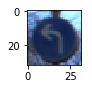

The Grayscale Image:


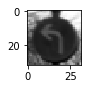

The Clipped Image:


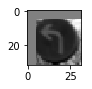

The Clipped Image Magnified:


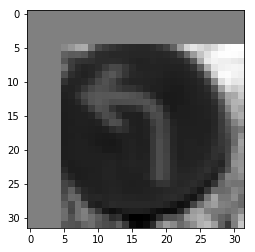

In [42]:
### Preprocess the data
### Normalize the data and other preprocessing steps including converting to grayscale, etc.
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

class ImagePreprocessor:
    def grayscale(self, image):
        YUV_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        return self.left_grayscale(YUV_image)
    
    def left_grayscale(self, YUV_image):
        gray_image_Y = np.zeros((32,32))
        for row in range(32):
            for col in range(32):
                gray_image_Y[row][col] = YUV_image[row][col][0]
        
        return gray_image_Y
    
    # Zero-center scaling for grayscale image data
    def normalize_grayscale(self, image_data):
        """
        Normalize the image data with zero-center scaling to a range of [-0.5, 0.5]
        :param image_data: The image data to be normalized
        :return: Normalized image data
        """
        gray_image = self.grayscale(image_data)
        
        min_value = np.min(gray_image)
        max_value = np.max(gray_image)
        range_value = max_value - min_value
        
        grayscale_center = (max_value + min_value) / 2.0
        scale_fact = 1.0 / range_value
        return (gray_image - grayscale_center) * scale_fact

# Test the ImagePreprocessor with one image
index = random.randint(0, X_train.shape[0])
image = X_train[index].squeeze()

image_preprocessor = ImagePreprocessor()
gray_image = image_preprocessor.normalize_grayscale(X_train[index])

print('The Original Image with Labe {}:'.format(y_train[index]))
plt.figure(figsize=(1, 1))
plt.imshow(image)
plt.show()

print('The Grayscale Image:')
plt.figure(figsize=(1, 1))
plt.imshow(gray_image, cmap='gray')
plt.show()

class ImageClipper:
    def __init__(self, image):
        self.image = image
        self.clipping_ratio = 0.15
        
        self.left_top_clipping_position_row = image.shape[0] * self.clipping_ratio
        self.left_top_clipping_position_column = image.shape[1] * self.clipping_ratio
        
        self.left_bottom_clipping_position_row = image.shape[0] * (1.0 - self.clipping_ratio)
        self.left_bottom_clipping_position_column = image.shape[1] * self.clipping_ratio
        
        self.right_top_clipping_position_row = image.shape[0] * self.clipping_ratio
        self.right_top_clipping_position_column = image.shape[1] * (1.0 - self.clipping_ratio)
        
        self.right_bottom_clipping_position_row = image.shape[0] * (1.0 - self.clipping_ratio)
        self.right_bottom_clipping_position_column = image.shape[1] * (1.0 - self.clipping_ratio)
    
    def get_clipped_images(self):
        clip_left_top = np.array(self.image)
        clip_left_bottom = np.array(self.image)
        clip_right_top = np.array(self.image)
        clip_right_bottom = np.array(self.image)
        
        # Left-top clipping
        for row in range(image.shape[0]):
            for column in range(image.shape[1]):
                if (row < self.left_top_clipping_position_row or column < self.left_top_clipping_position_column):
                    clip_left_top[row][column] = 0.0
        
        # Left-bottom clipping
        for row in range(image.shape[0]):
            for column in range(image.shape[1]):
                if (row > self.left_bottom_clipping_position_row or column < self.left_bottom_clipping_position_column):
                    clip_left_bottom[row][column] = 0.0
        
        # Right-top clipping
        for row in range(image.shape[0]):
            for column in range(image.shape[1]):
                if (row < self.right_top_clipping_position_row or column > self.right_top_clipping_position_column):
                    clip_right_top[row][column] = 0.0
        
        # Right-bottom clipping
        for row in range(image.shape[0]):
            for column in range(image.shape[1]):
                if (row > self.right_bottom_clipping_position_row or column > self.right_bottom_clipping_position_column):
                    clip_right_bottom[row][column] = 0.0
        
        return [clip_left_top, clip_left_bottom, clip_right_top, clip_right_bottom]

# Test the ImageClipper
image_clipper = ImageClipper(gray_image)
clipped_images = image_clipper.get_clipped_images()

print('The Clipped Image:')
plt.figure(figsize=(1, 1))
plt.imshow(clipped_images[0], cmap='gray')
plt.show()

print('The Clipped Image Magnified:')
plt.imshow(clipped_images[0], cmap='gray')
plt.show()

## Dataset Transform
Transform the datasets from colored images to grascale images to imporve the performance


Image Shape: (32, 32, 1)

Training Set:   173995 samples
Validation Set: 22050 samples
Test Set:       63150 samples
Classes:        43

Training Image Index: 71816
Training Image Label: 38
Training Image:


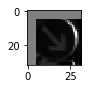

In [44]:
generate_features_flag = False
generate_clipped_images_flag = True

def generate_clipped_images(image, label, X_generated, y_generated):
    image_clipper = ImageClipper(image)
    clipped_images = image_clipper.get_clipped_images()
    for (i, clipped_image) in enumerate(clipped_images):
        X_generated.append(clipped_image.reshape([32, 32, 1]))
        y_generated.append(label)

def generate_features(X_origin, y_origin, X_generated, y_generated):
    image_preprocessor = ImagePreprocessor()
    for index in range(X_origin.shape[0]):
        normalized_gray_image = image_preprocessor.normalize_grayscale(X_origin[index])
        X_generated.append(normalized_gray_image.reshape([32, 32, 1]))
        y_generated.append(y_origin[index])
        
        if generate_clipped_images_flag:
            generate_clipped_images(normalized_gray_image, y_origin[index], X_generated, y_generated)

if generate_features_flag:
    X_train_generated = []
    X_validation_generated = []
    X_test_generated = []
    
    y_train_generated = []
    y_validation_generated = []
    y_test_generated = []
    
    generate_features(X_train, y_train, X_train_generated, y_train_generated)
    generate_features(X_validation, y_validation, X_validation_generated, y_validation_generated)
    generate_features(X_test, y_test, X_test_generated, y_test_generated)
    
    train_features_to_save = np.array(X_train_generated)
    validation_features_to_save = np.array(X_validation_generated)
    test_features_to_save = np.array(X_test_generated)
    
    y_train_to_save = np.array(y_train_generated)
    y_validation_to_save = np.array(y_validation_generated)
    y_test_to_save = np.array(y_test_generated)
    
    training_file_to_save = 'traffic-signs-data/train_generated.p'
    validation_file_to_save = 'traffic-signs-data/valid_generated.p'
    testing_file_to_save = 'traffic-signs-data/test_generated.p'
    
    with open(training_file_to_save, mode='wb') as f:
        pickle.dump({'features': train_features_to_save, 'labels': y_train_to_save}, f)
    with open(validation_file_to_save, mode='wb') as f:
        pickle.dump({'features': validation_features_to_save, 'labels': y_validation_to_save}, f)
    with open(testing_file_to_save, mode='wb') as f:
        pickle.dump({'features': test_features_to_save, 'labels': y_test_to_save}, f)

training_file = 'traffic-signs-data/train_generated.p'
validation_file= 'traffic-signs-data/valid_generated.p'
testing_file = 'traffic-signs-data/test_generated.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

train_features, y_train = train['features'], train['labels']
validation_features, y_validation = validation['features'], validation['labels']
test_features, y_test = test['features'], test['labels']

# Number of training examples
n_train = train_features.shape[0]

# Number of validation examples
n_validation = validation_features.shape[0]

# Number of testing examples
n_test = test_features.shape[0]

# The shape of an traffic sign image
image_shape = train_features.shape[1:3]

# Number of unique classes/labels in the dataset
n_classes = len(np.unique(y_train))

assert(len(train_features) == len(y_train))
assert(len(validation_features) == len(y_validation))
assert(len(test_features) == len(y_test))

print()
print('Image Shape: {}'.format(train_features[0].shape))
print()
print('Training Set:   {} samples'.format(len(train_features)))
print('Validation Set: {} samples'.format(len(validation_features)))
print('Test Set:       {} samples'.format(len(test_features)))
print('Classes:        {}'.format(n_classes))

# Show one image of the images
print()
index = random.randint(0, train_features.shape[0])
print('Training Image Index: {0}'.format(index))
print('Training Image Label: {0}'.format(y_train[index]))
print('Training Image:')
image = train_features[index].squeeze()
plt.figure(figsize = (1, 1))
plt.imshow(image, cmap = 'gray')
plt.show()

### Model Architecture

In [45]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional, Input = 32x32x1, Output = 28x28x12
    conv1_filters = 12
    conv1_weights = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, conv1_filters), mean = mu, stddev = sigma))
    conv1_biases = tf.Variable(tf.zeros(conv1_filters))
    conv1_strides = [1, 1, 1, 1]
    conv1_pading = 'VALID'
    conv1_output = tf.nn.conv2d(x, conv1_weights, conv1_strides, conv1_pading) + conv1_biases

    # Activation
    relu1_output = tf.nn.relu(conv1_output)

    # Pooling: Input = 28x28x12, Output = 14x14x12
    pooling1_ksize = [1, 2, 2, 1]
    pooling1_strides = [1, 2, 2, 1]
    pooling1_pading = 'VALID'
    pooling1_output = tf.nn.max_pool(relu1_output, pooling1_ksize, pooling1_strides, pooling1_pading)

    # Layer 2: Convolutional, Output = 10x10x24
    conv2_filters = 24
    conv2_weights = tf.Variable(tf.truncated_normal(shape = (5, 5, conv1_filters, conv2_filters), mean = mu, stddev = sigma))
    conv2_biases = tf.Variable(tf.zeros(conv2_filters))
    conv2_strides = [1, 1, 1, 1]
    conv2_pading = 'VALID'
    conv2_output = tf.nn.conv2d(pooling1_output, conv2_weights, conv2_strides, conv2_pading) + conv2_biases
    
    # Activation
    relu2_output = tf.nn.relu(conv2_output)

    # Pooling: Input = 10x10x24, Output = 5x5x24
    pooling2_ksize = [1, 2, 2, 1]
    pooling2_strides = [1, 2, 2, 1]
    pooling2_pading = 'VALID'
    pooling2_output = tf.nn.max_pool(relu2_output, pooling2_ksize, pooling2_strides, pooling2_pading)

    # Flatten: Input = 5x5x24, Output = 400
    fc0 = flatten(pooling2_output)
    
    # Layer 3: Fully Connected, Input = 400, Output = 256
    fc1_inputs = 5 * 5 * conv2_filters
    fc1_ouputs = 256
    fc1_weights = tf.Variable(tf.truncated_normal(shape = (fc1_inputs, fc1_ouputs), mean = mu, stddev = sigma))
    fc1_biases = tf.Variable(tf.zeros(fc1_ouputs))
    fc1_output = tf.matmul(fc0, fc1_weights) + fc1_biases
    
    # Activation
    fc1_relu = tf.nn.relu(fc1_output)

    # Layer 4: Fully Connected, Input = 256, Output = 128
    fc2_inputs = fc1_ouputs
    fc2_ouputs = 128
    fc2_weights = tf.Variable(tf.truncated_normal(shape = (fc2_inputs, fc2_ouputs), mean = mu, stddev = sigma))
    fc2_biases = tf.Variable(tf.zeros(fc2_ouputs))
    fc2_output = tf.matmul(fc1_relu, fc2_weights) + fc2_biases
    
    # Activation
    fc2_relu = tf.nn.relu(fc2_output)

    # Layer 5: Fully Connected, Input = 128, Output = 43
    fc3_inputs = fc2_ouputs
    fc3_ouputs = n_classes
    fc3_weights = tf.Variable(tf.truncated_normal(shape = (fc3_inputs, fc3_ouputs), mean = mu, stddev = sigma))
    fc3_biases = tf.Variable(tf.zeros(fc3_ouputs))
    logits = tf.matmul(fc2_relu, fc3_weights) + fc3_biases
    
    return tf.identity(logits, name='logits')

## Features and Labels
`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [46]:
# One-Hot Encoding
inputs = tf.placeholder(tf.float32, (None, 32, 32, 1), name = 'inputs')
labels = tf.placeholder(tf.int32, (None), name = 'labels')
one_hot_labels = tf.one_hot(labels, 43)

## Evaluation

In [47]:
import tensorflow as tf
from sklearn.utils import shuffle

EPOCHS = 30
BATCH_SIZE = 64
rate = 0.001

logits = LeNet(inputs)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_labels, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy, name = 'cost')
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_labels, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name = 'accuracy')

# Model evaluation
def evaluate(X_data, y_data):
    num_examples = X_data.shape[0]
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset : offset + BATCH_SIZE], y_data[offset : offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {inputs: batch_x, labels: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / num_examples

### Train, Validate and Test the Model
A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
### Train the model
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set is calculated and reported as well.
import tensorflow as tf

saver = tf.train.Saver()

train_features_shuffled = train_features
train_labels_shuffled = y_train

# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = X_train.shape[0]
    
    print('Training...')
    for i in range(EPOCHS):
        train_features_shuffled, train_labels_shuffled = shuffle(train_features_shuffled, train_labels_shuffled)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features_shuffled[offset:end], train_labels_shuffled[offset:end]
            sess.run(training_operation, feed_dict={inputs: batch_x, labels: batch_y})
        
        validation_accuracy = evaluate(validation_features, y_validation)
        train_accuracy = evaluate(train_features, y_train)
        print('EPOCH {}: Training Accuracy = {:.3f}, Validation Accuracy = {:.3f}'.format(i + 1, train_accuracy, validation_accuracy))
    
    saver.save(sess, './LeNet_Traffic_Sign_Classifier')
    print('Model saved')

Training...
EPOCH 1: Training Accuracy = 0.934, Validation Accuracy = 0.860
EPOCH 2: Training Accuracy = 0.971, Validation Accuracy = 0.903
EPOCH 3: Training Accuracy = 0.986, Validation Accuracy = 0.914
EPOCH 4: Training Accuracy = 0.988, Validation Accuracy = 0.921
EPOCH 5: Training Accuracy = 0.993, Validation Accuracy = 0.927
EPOCH 6: Training Accuracy = 0.992, Validation Accuracy = 0.929
EPOCH 7: Training Accuracy = 0.992, Validation Accuracy = 0.935
EPOCH 8: Training Accuracy = 0.991, Validation Accuracy = 0.916
EPOCH 9: Training Accuracy = 0.997, Validation Accuracy = 0.925
EPOCH 10: Training Accuracy = 0.998, Validation Accuracy = 0.944
EPOCH 11: Training Accuracy = 0.997, Validation Accuracy = 0.939
EPOCH 12: Training Accuracy = 0.996, Validation Accuracy = 0.928
EPOCH 13: Training Accuracy = 0.996, Validation Accuracy = 0.943
EPOCH 14: Training Accuracy = 0.998, Validation Accuracy = 0.938
EPOCH 15: Training Accuracy = 0.998, Validation Accuracy = 0.944
EPOCH 16: Training Acc

In [14]:
import tensorflow as tf

# Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_features, y_test)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))

Test Accuracy = 0.937


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Test Image 1:


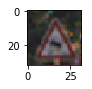

Test Image 2:


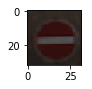

Test Image 3:


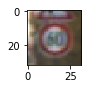

Test Image 4:


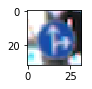

Test Image 5:


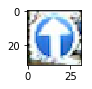

In [15]:
### Load the images and plot them
### Pre-process the images with the same pre-processing pipeline used earlier
import os
import matplotlib.pyplot as plt

test_images = []
test_gray_images = []

index = 0
image_preprocessor = ImagePreprocessor()
test_images_list = os.listdir('./traffic_sign_test_images')
for image_file in test_images_list:
    if not image_file.endswith('.png'):
        continue
    
    image_path = './traffic_sign_test_images/' + image_file
    image = plt.imread(image_path)
    test_images.append(image)
    
    gray_image = image_preprocessor.normalize_grayscale(image)
    test_gray_images.append(gray_image.reshape([32, 32, 1]))
    
    print('Test Image {}:'.format(index + 1))
    index = index + 1
    plt.figure(figsize = (1, 1))
    plt.imshow(image)
    plt.show()

### Predict the Sign Type for Each Image

Predictions of Test Images:

Test Image 1 Prediction: 23 (Slippery road)


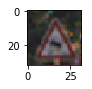

Test Image 2 Prediction: 17 (No entry)


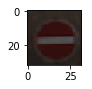

Test Image 3 Prediction: 3 (Speed limit (60km/h))


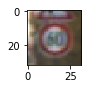

Test Image 4 Prediction: 36 (Go straight or right)


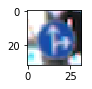

Test Image 5 Prediction: 35 (Ahead only)


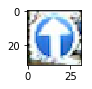

In [28]:
### Run the predictions and use the model to output the prediction for each image
import tensorflow as tf
import numpy as np
import pandas

sign_names = pandas.read_csv('signnames.csv')['SignName']

loaded_graph = tf.Graph()
with tf.Session(graph = loaded_graph) as sess:
    loader = tf.train.import_meta_graph('./LeNet_Traffic_Sign_Classifier.meta')
    loader.restore(sess, './LeNet_Traffic_Sign_Classifier')
    loaded_inputs = loaded_graph.get_tensor_by_name('inputs:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    
    logits = sess.run(loaded_logits, feed_dict = {loaded_inputs: test_gray_images})
    predictions = np.argmax(logits, axis = 1)
    
    print('Predictions of Test Images:')
    print()
    for index in range(len(predictions)):
        predicted_label = predictions[index]
        print('Test Image {} Prediction: {} ({})'.format(index + 1, predicted_label, sign_names[predicted_label]))
        
        plt.figure(figsize = (1, 1))
        plt.imshow(test_images[index])
        plt.show()

### Analyze Performance

In [26]:
### Calculate the accuracy for these 5 new images
import tensorflow as tf
import numpy as np
import pandas

test_lables = np.array([23, 17, 3, 36, 35])

loaded_graph = tf.Graph()
with tf.Session(graph = loaded_graph) as sess:
    loader = tf.train.import_meta_graph('./LeNet_Traffic_Sign_Classifier.meta')
    loader.restore(sess, './LeNet_Traffic_Sign_Classifier')
    loaded_inputs = loaded_graph.get_tensor_by_name('inputs:0')
    loaded_labels = loaded_graph.get_tensor_by_name('labels:0')
    loaded_accuracy = loaded_graph.get_tensor_by_name('accuracy:0')
    
    test_accuracy = sess.run(loaded_accuracy, feed_dict = {loaded_inputs: test_gray_images, loaded_labels: test_lables.astype(float)})
    print('Prediction Accuracy = {:.3f}'.format(test_accuracy))

Prediction Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Softmax Probability of Test Image Predictions:


Test Image 1: Slippery road
---------------------------------------------------


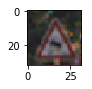

	Slippery road:	0.99999571
	Dangerous curve to the left:	0.00000424
	Double curve:	0.00000000
	Wild animals crossing:	0.00000000
	No passing for vehicles over 3.5 metric tons:	0.00000000


Test Image 2: No entry
---------------------------------------------------


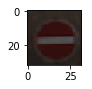

	No entry:	1.00000000
	Traffic signals:	0.00000000
	Speed limit (20km/h):	0.00000000
	Wild animals crossing:	0.00000000
	Speed limit (60km/h):	0.00000000


Test Image 3: Speed limit (60km/h)
---------------------------------------------------


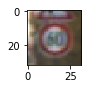

	Speed limit (60km/h):	0.99990976
	Speed limit (80km/h):	0.00009026
	Speed limit (50km/h):	0.00000000
	Ahead only:	0.00000000
	End of speed limit (80km/h):	0.00000000


Test Image 4: Go straight or right
---------------------------------------------------


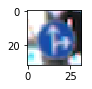

	Go straight or right:	1.00000000
	Ahead only:	0.00000002
	Keep right:	0.00000002
	End of all speed and passing limits:	0.00000000
	End of no passing:	0.00000000


Test Image 5: Ahead only
---------------------------------------------------


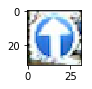

	Ahead only:	0.99899644
	No passing:	0.00099603
	Turn right ahead:	0.00000391
	Yield:	0.00000367
	No vehicles:	0.00000003


In [48]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web 
import tensorflow as tf
import numpy as np
import pandas

test_lables = np.array([23, 17, 3, 36, 35])
sign_names = pandas.read_csv('signnames.csv')['SignName']

loaded_graph = tf.Graph()
with tf.Session(graph = loaded_graph) as sess:
    loader = tf.train.import_meta_graph('./LeNet_Traffic_Sign_Classifier.meta')
    loader.restore(sess, './LeNet_Traffic_Sign_Classifier')
    loaded_inputs = loaded_graph.get_tensor_by_name('inputs:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    
    logits = sess.run(loaded_logits, feed_dict = {loaded_inputs: test_gray_images})
    prediction_top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5))
    predictions = np.argmax(logits, axis = 1)
    
    print('Softmax Probability of Test Image Predictions:')
    for index in range(len(predictions)):
        predicted_label = predictions[index]
        print('\n\nTest Image {}: {}'.format(index + 1, sign_names[predicted_label]))
        print('---------------------------------------------------')
        
        plt.figure(figsize = (1, 1))
        plt.imshow(test_images[index])
        plt.show()
        
        for label_index in range(5):
            sign_index = sign_names[prediction_top5.indices[index][label_index]]
            sign_value = prediction_top5.values[index][label_index]
            print('\t{}:\t{:.8f}'.format(sign_index, sign_value))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")